In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from finance_core import *

name = 'IZOSTAL'

In [77]:
df = pd.read_html('https://www.biznesradar.pl/raporty-finansowe-rachunek-zyskow-i-strat/'+name+',Q')[-3].drop([
                                                                                    0,6,7,8,9,10,11,12,13,15,17]).set_index('Unnamed: 0')
shares = pd.read_html('https://www.biznesradar.pl/wskazniki-wartosci-rynkowej/'+name)[0].drop([0,2,3,4,5,6,7,8,9
                                                                                             ,10,11,12,13,14,15]).set_index('Unnamed: 0')

del df["Unnamed: "+str(len(df.columns))]  
del shares["Unnamed: "+str(len(shares.columns))] 

df = df.drop(df.columns[0:5], axis=1)
shares = shares.drop(shares.columns[0:(len(shares.columns)-len(df.columns))]   ,axis=1)
df.columns = df.columns.str.slice(start=2 , stop=7)
shares.columns = df.columns

for i in range(len(df.columns)):
    df[str(df.columns[i])] = df[str(df.columns[i])].str.replace('(k/k).*','')
    df[str(df.columns[i])] = df[str(df.columns[i])].str.replace('(r/r).*','')
    df[str(df.columns[i])] = df[str(df.columns[i])].str.replace(' ','')
    shares[str(shares.columns[i])] = shares[str(shares.columns[i])].str.replace(' ','')
    
for j in range(8):
    df.iloc[j] = pd.to_numeric(df.iloc[j], errors="coerce")
    
df = df.apply(pd.to_numeric, errors='ignore')
shares = shares.apply(pd.to_numeric, errors='ignore')
data = df.T[-17::]

x = data['Zysk netto'].values
timeline = np.array(data.index)

data = data/1000

data

<ipython-input-77-e00d2867ee69>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df[str(df.columns[i])] = df[str(df.columns[i])].str.replace('(k/k).*','')
<ipython-input-77-e00d2867ee69>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df[str(df.columns[i])] = df[str(df.columns[i])].str.replace('(r/r).*','')


Unnamed: 0,Przychody ze sprzedaży,Techniczny koszt wytworzenia produkcji sprzedanej,Koszty sprzedaży,Koszty ogólnego zarządu,Zysk ze sprzedaży,Zysk przed opodatkowaniem,Zysk netto,EBITDA
18/Q1,210.451,191.385,8.750,5.058,5.258,4.539,3.587,7.280
18/Q2,186.153,168.695,6.295,5.681,5.482,4.259,3.419,6.313
18/Q3,239.909,216.697,11.499,5.683,6.030,6.857,5.535,8.006
18/Q4,229.824,224.688,-2.618,6.149,1.605,4.140,3.345,3.475
19/Q1,218.702,205.891,2.776,5.225,4.810,5.196,4.154,6.979
19/Q2,171.152,158.514,3.198,5.600,3.840,4.048,3.265,6.479
19/Q3,165.934,152.696,3.439,5.386,4.413,3.155,2.589,6.897
19/Q4,214.543,198.933,3.674,6.804,5.132,3.562,3.023,3.386
20/Q1,205.719,186.482,5.698,5.406,8.133,4.992,3.913,10.826
20/Q2,212.526,192.728,8.635,6.405,4.758,5.604,4.581,7.063


In [85]:
summary_df = data.describe()
summary_df

Unnamed: 0,Przychody ze sprzedaży,Techniczny koszt wytworzenia produkcji sprzedanej,Koszty sprzedaży,Koszty ogólnego zarządu,Zysk ze sprzedaży,Zysk przed opodatkowaniem,Zysk netto,EBITDA
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,213.847412,197.856118,5.329529,6.107588,4.554176,4.923471,3.929882,6.775882
std,43.712701,42.510826,3.383462,0.725574,1.904592,1.121510,0.914903,1.991690
min,158.450000,142.762000,-2.618000,5.058000,1.095000,3.155000,2.589000,3.386000
25%,186.153000,168.695000,3.198000,5.600000,3.840000,4.253000,3.267000,5.500000
50%,214.543000,198.406000,5.698000,6.020000,4.810000,4.539000,3.587000,6.897000
75%,225.714000,211.155000,7.382000,6.497000,5.482000,5.447000,4.349000,7.280000
max,342.798000,323.745000,11.499000,7.366000,8.133000,6.968000,5.618000,10.826000


array([4.539, 4.259, 6.857, 4.14 , 5.196, 4.048, 3.155, 3.562, 4.992,
       5.604, 4.253, 4.289, 6.699, 6.968, 5.447, 4.386, 5.305])

array([5.67766176, 5.73567647, 5.79369118, 5.85170588, 5.90972059])

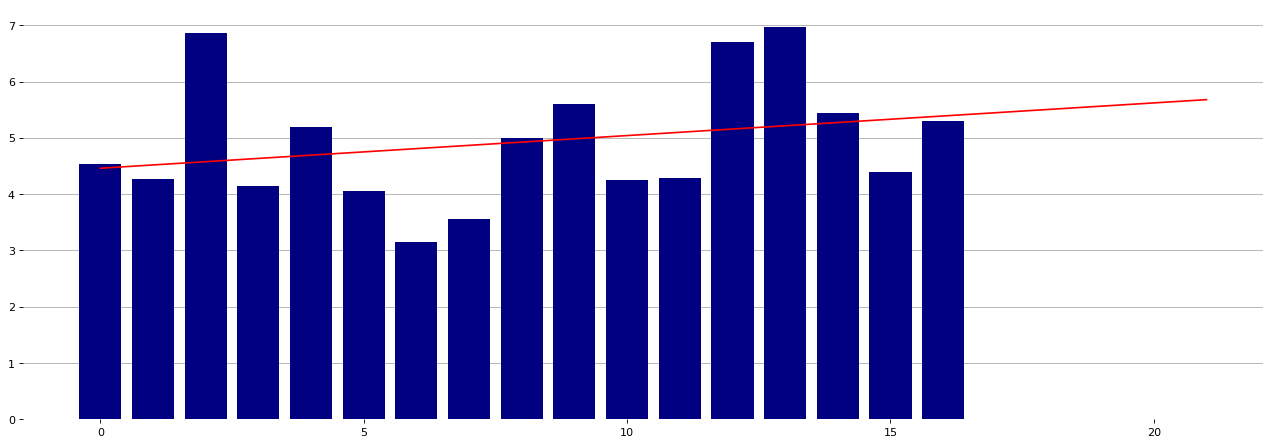

In [86]:
Revenue = data['Przychody ze sprzedaży']
Net_profit = data['Zysk przed opodatkowaniem']

y = Net_profit.values
x = np.arange(len(y))

model_1 = LinearRegression(fit_intercept=True)

display(y)

X = x[:, np.newaxis]


model_1.fit(X, y)

a = model_1.coef_ 
b = model_1.intercept_




# ____________________________________________________
plt.figure(figsize = (20,15) , dpi=80)
ax = plt.subplot(211)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.yaxis.grid(True)
ax.set_axisbelow(True)
plt.bar(x, y, color = 'navy')

xfit = np.linspace(0, 21)
Xfit = xfit[:, np.newaxis]
yfit = model_1.predict(Xfit)
plt.plot(xfit, yfit, color='red')





x = [21,22,23,24,25]
display(a*x + b)



In [109]:
#display(summary_df)

display(summary_df.drop(['count', 'min', 'max']))

display(cagr(y[0], y[-1], len(y)/4))

Unnamed: 0,Przychody ze sprzedaży,Techniczny koszt wytworzenia produkcji sprzedanej,Koszty sprzedaży,Koszty ogólnego zarządu,Zysk ze sprzedaży,Zysk przed opodatkowaniem,Zysk netto,EBITDA
mean,213.847412,197.856118,5.329529,6.107588,4.554176,4.923471,3.929882,6.775882
std,43.712701,42.510826,3.383462,0.725574,1.904592,1.121510,0.914903,1.991690
25%,186.153000,168.695000,3.198000,5.600000,3.840000,4.253000,3.267000,5.500000
50%,214.543000,198.406000,5.698000,6.020000,4.810000,4.539000,3.587000,6.897000
75%,225.714000,211.155000,7.382000,6.497000,5.482000,5.447000,4.349000,7.280000


3.74